<a href="https://colab.research.google.com/github/pisceno/algoritmos/blob/master/Detecci%C3%B3n_de_Anomal%C3%ADas_Rango_Intercuartil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/juarezefren/datasets/main/titanic_train.csv'

df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df = df.drop(columns=['PassengerId'])
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


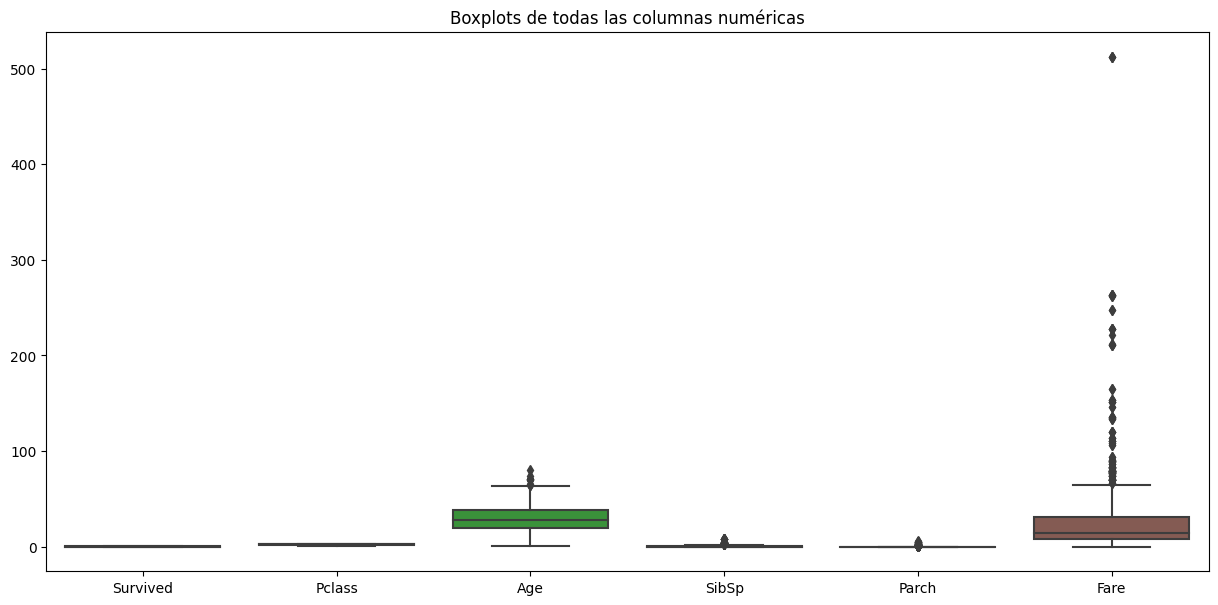

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dibujar los boxplots
plt.figure(figsize=(15,7))
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']))
plt.title('Boxplots de todas las columnas numéricas')
plt.show()



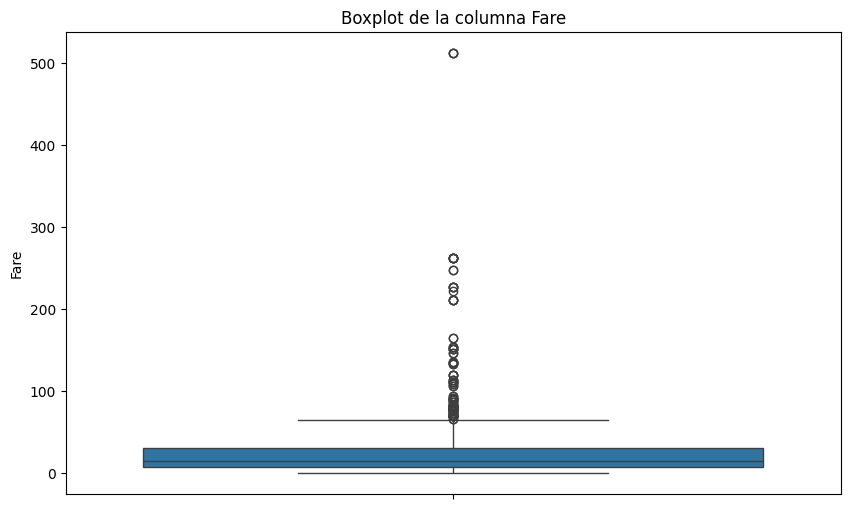

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dibujar el boxplot para la columna 'Fare'
plt.figure(figsize=(10,6))
sns.boxplot(y=df['Fare'])
plt.title('Boxplot de la columna Fare')
plt.show()


In [ ]:
df.shape

(891, 11)

In [ ]:
# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)

# Calcular el IQR (Rango Intercuartil)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
outliers

# Filtramos las anomalías
df_filtered = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

df_filtered.shape


(775, 11)

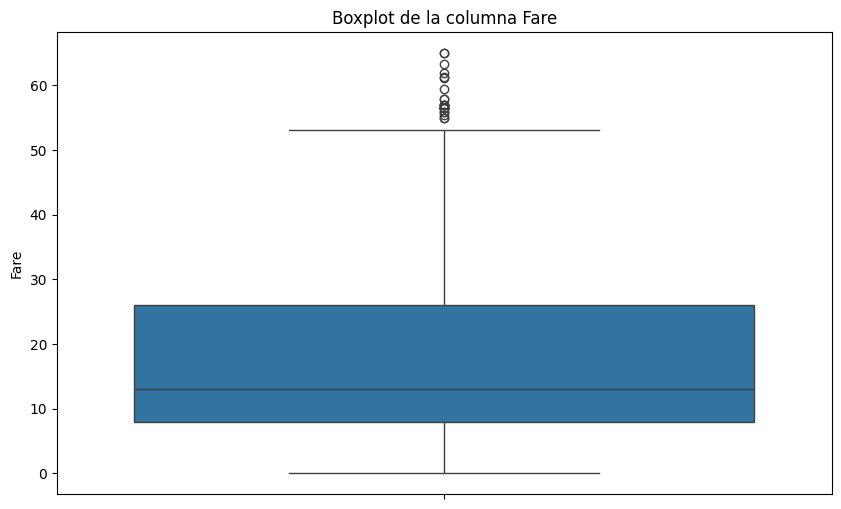

In [ ]:
# Dibujar el boxplot para la columna 'Fare'
plt.figure(figsize=(10,6))
sns.boxplot(y=df_filtered['Fare'])
plt.title('Boxplot de la columna Fare')
plt.show()